# Heart Disease Classification Project

## Get the data

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Read in data
df = pd.read_csv('files/framingham.csv')
df.info() # 4239 data points, 16 anonymized columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


#### Columns:
    
* Demographic risk factors:
    1. sex: male or female;
    2. age: age of the patient;
    3. education: levels coded 1 for some high school, 2 for a high school diploma or GED, 3 for some college or vocational school, and 4 for a college degree.


* Behavioral risk factors
    4. currentSmoker: whether or not the patient is a current smoker
    5. cigsPerDay: the number of cigarettes that the person smoked on average in one day.


* Medical history risk factors
    6. BPMeds: whether or not the patient was on blood pressure medication
    7. prevalentStroke: whether or not the patient had previously had a stroke
    8. prevalentHyp: whether or not the patient was hypertensive
    9. diabetes: whether or not the patient had diabetes


* Physical Examination Risk Factors:
    10. totChol: total cholesterol level
    11. sysBP: systolic blood pressure
    12. diaBP: diastolic blood pressure
    13. BMI: Body Mass Index
    14. heartRate: heart rate
    15. glucose: glucose level
    16. TenYearCHD: 10 year risk of coronary heart disease CHD

In [4]:
df.head() # Several risk factors may or may not predict 10 year heart disease risk

male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           0

## EDA

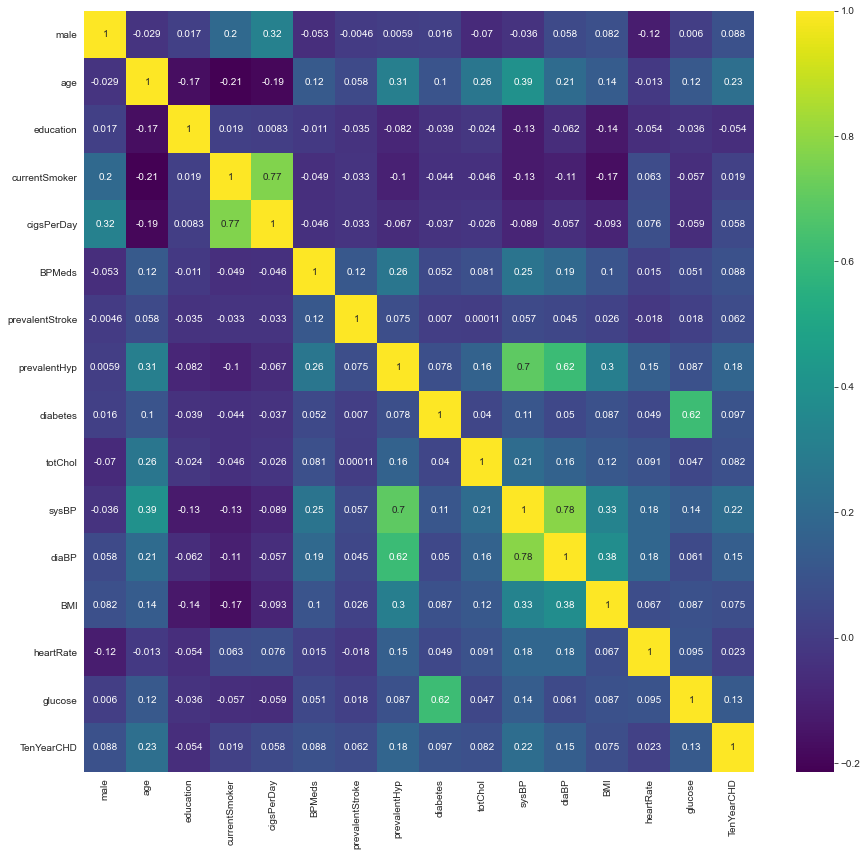

In [5]:
plt.figure(figsize=(15,14))
sns.heatmap(df.corr(),annot=True,cmap='viridis')

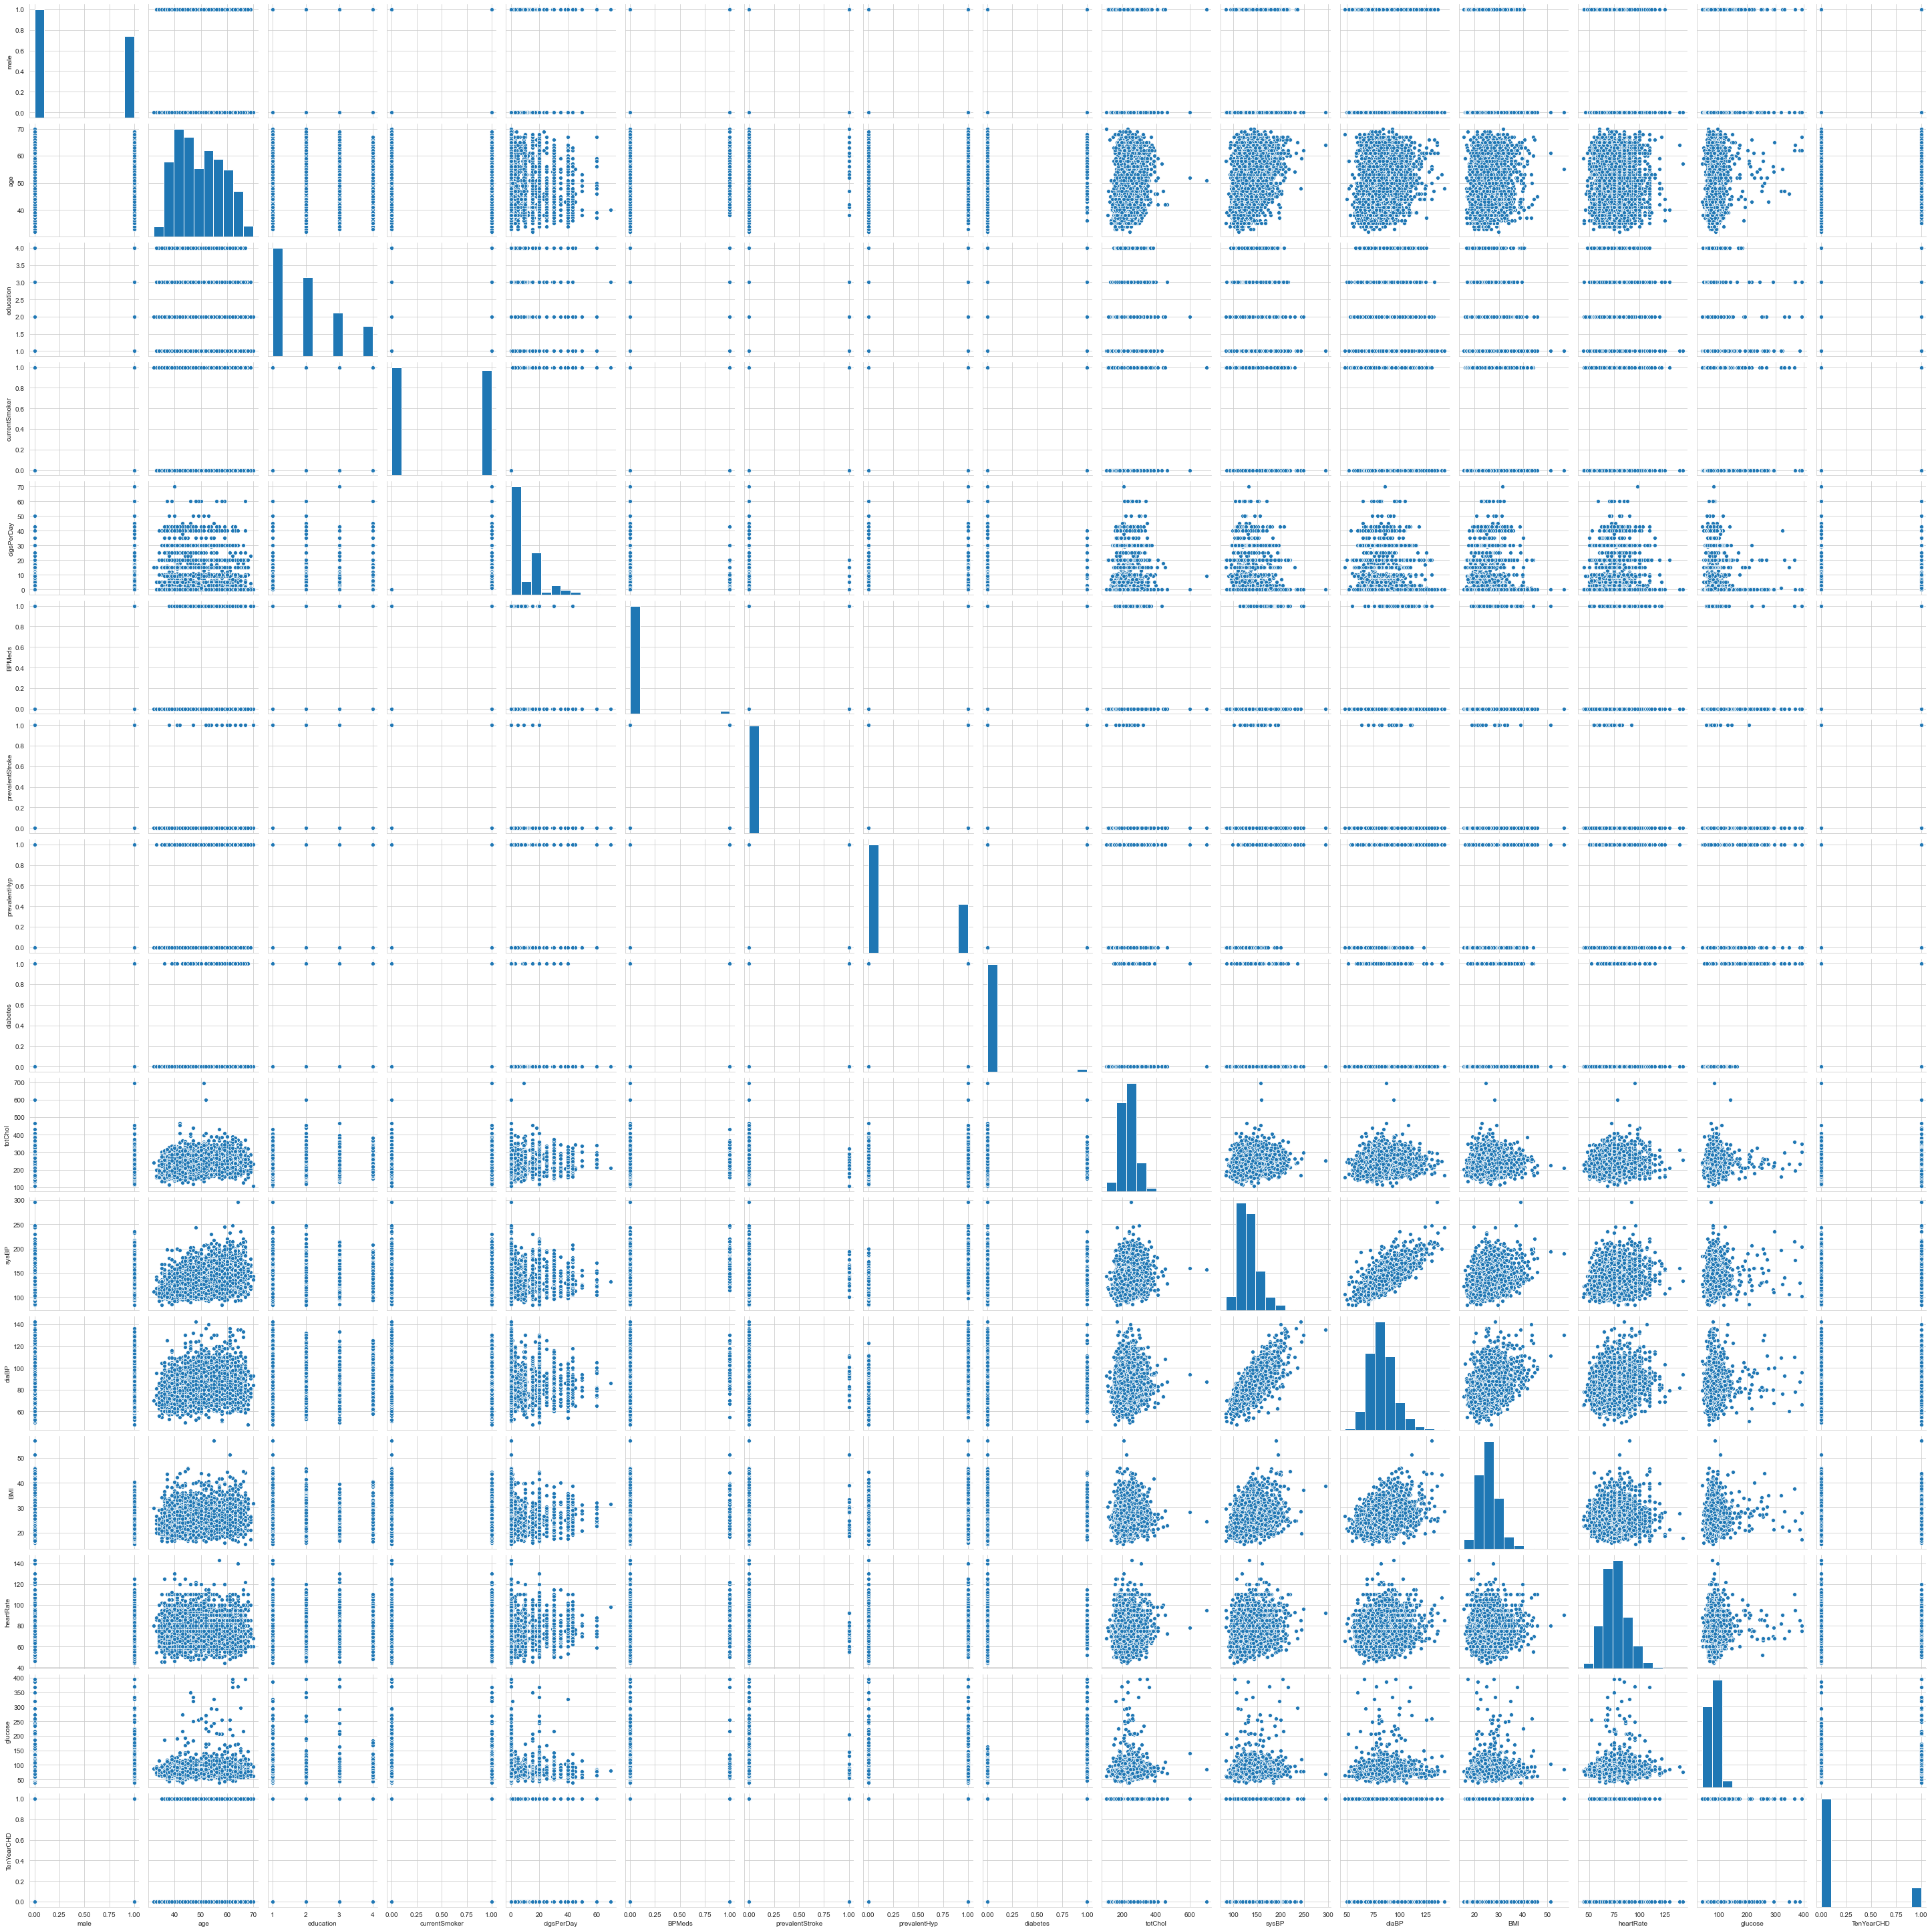

In [6]:
sns.pairplot(df)

#### Some noteworthy correlations: 

Roads to CHD: 

1. Aging 
    1. Positive relationship between Age and blood pressure. 
    2. Positive relationship between blood pressure and hypertension. 
    3. Positive relationship between hypertension and 10 year CHD. 


2. Overweight
    1. Positive relationship between BMI and blood pressure. 
        - Possible comorbidity: 
            - positive relationship between glucose and diabetes
            - positive relationship between diabetes and blood pressure
    2. Positive relationship between blood pressure and hypertension. 
    3. Positive relationship between hypertension and 10 year CHD. 


3. Smoking 
    1. Positive relationship between Smoking and heart rate.
    2. Positive relationship between heart rate and blood pressure. 
    3. Positive relationship between blood pressure and hypertension. 
    4. Positive relationship between hypertension and 10 year CHD. 

## Data Prep

### See where values are missing 

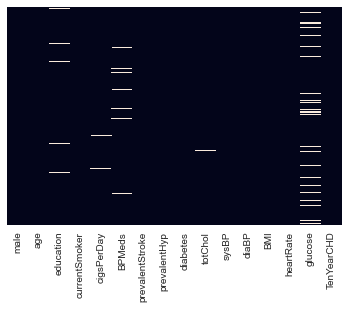

In [7]:
# glucose, totChol, BPMeds, cigsPerDay, education have missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 

### Impute missing values

#### Education

In [8]:
# Fill in missing education levels with the most common value
df['education'].fillna(float(str(df['education'].mode()).split()[1]),inplace=True)
df['education'].unique() # No more NaN

array([4., 2., 1., 3.])

#### Cigarettes per day

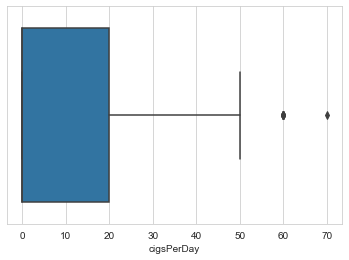

In [9]:
sns.boxplot(df['cigsPerDay']) # right skewed, don't use mean

In [10]:
# Fill in missing cigarette consumption with the median
df['cigsPerDay'].fillna(df['cigsPerDay'].median(),inplace=True)
df['cigsPerDay'].isnull().unique() # No more NaN

array([False])

#### BPMeds

In [11]:
# Fill in missing BPMEds values with the median
df['BPMeds'].fillna(float(str(df['BPMeds'].mode()).split()[1]),inplace=True)
df['BPMeds'].unique() # no more NaN

array([0., 1.])

#### Total cholesterol

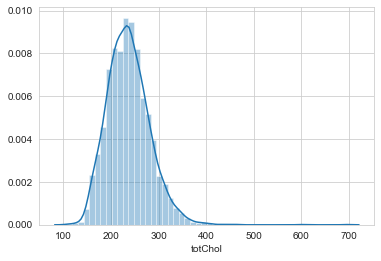

In [12]:
sns.distplot(df['totChol']) # Pretty normally distributed, can use mean

In [13]:
# Fill in missing cholesterol levels with the mean
df['totChol'].fillna(df['totChol'].mean(),inplace=True)
df['totChol'].isnull().unique() # no more NaN

array([False])

#### Glucose

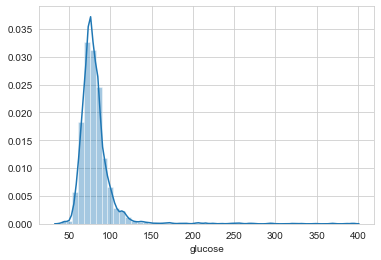

In [14]:
sns.distplot(df['glucose']) # Pretty normally distributed, can use mean

In [15]:
# Fill in missing glucose levels with the mean
df['glucose'].fillna(df['glucose'].mean(),inplace=True)
df['glucose'].isnull().unique() # no more NaN

array([False])

#### BMI

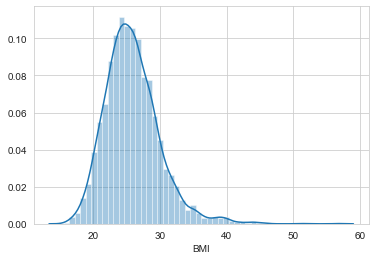

In [16]:
sns.distplot(df['BMI']) # Pretty normally distributed, can use mean

In [17]:
# Fill in missing BMIs with the mean
df['BMI'].fillna(df['BMI'].mean(),inplace=True)
df['BMI'].isnull().unique() # no more NaN

array([False])

#### Heart Rate

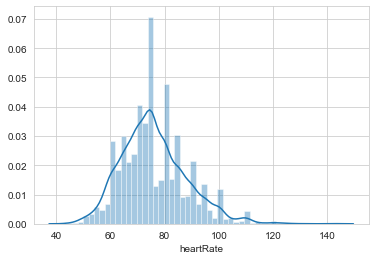

In [18]:
sns.distplot(df['heartRate']) # Pretty normally distributed, can use mean

In [19]:
# Fill in missing heart rates with the mean
df['heartRate'].fillna(df['heartRate'].mean(),inplace=True)
df['heartRate'].isnull().unique() # no more NaN

array([False])

#### Check if there are still missing values

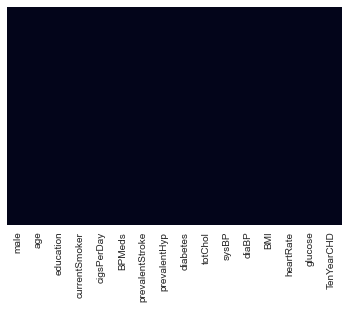

In [20]:
# No more missing data
sns.heatmap(df.isnull(), yticklabels=False, cbar=False) 

### Split data into train and test

In [21]:
# Create the features and target variable
X = df.drop('TenYearCHD',axis=1)
y = df['TenYearCHD']

In [22]:
# Split data into train and test 

# 75% train/valid
X_train_valid = X.loc[:3199] 
y_train_valid = y[:3200]

# 25% test
X_test = X.loc[3200:]
y_test = y[3200:]  

In [23]:
# Further split data into training and validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, test_size=0.3)

## Modelling

### Logistic Regression

#### Build and train the model 

In [24]:
# instantiate the model 
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression()

In [25]:
# Fit the model to the training data
lm.fit(X_train,y_train)

LogisticRegression()

In [26]:
# Make predictions on the validation data
pred = lm.predict(X_valid)

#### Validate Logistic model

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_valid,pred)) # 805 TN, 4 FP, 147 FN, 4 TP (FN too high, eventually will learn to minimize)
print(classification_report(y_valid,pred)) # 84% accuracy, 79% precision, 84% recall, 78% f1 score

[[805   4]
 [147   4]]
              precision    recall  f1-score   support

           0       0.85      1.00      0.91       809
           1       0.50      0.03      0.05       151

    accuracy                           0.84       960
   macro avg       0.67      0.51      0.48       960
weighted avg       0.79      0.84      0.78       960



#### Check if varying threshold can improve model performance

In [28]:
# No significant improvement to model performance overall, but can decrease threshold list to reduce number of false negatives 
from sklearn import metrics
pred_proba_df = pd.DataFrame(lm.predict_proba(X_valid))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]

# Loop through all threshold lists
for i in threshold_list:
    # Print threshold value
    print ('\n******** For i = {} ******'.format(i))
    y_valid_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    # Print confusion matrix
    print(confusion_matrix(y_valid.to_numpy().reshape(y_valid.to_numpy().size,1),
                           y_valid_pred.iloc[:,1].to_numpy().reshape(y_valid_pred.iloc[:,1].to_numpy().size,1)))
    # Print Classification Report
    print(classification_report(y_valid.to_numpy().reshape(y_valid.to_numpy().size,1),
                           y_valid_pred.iloc[:,1].to_numpy().reshape(y_valid_pred.iloc[:,1].to_numpy().size,1)))


******** For i = 0.05 ******
[[ 72 737]
 [  8 143]]
              precision    recall  f1-score   support

           0       0.90      0.09      0.16       809
           1       0.16      0.95      0.28       151

    accuracy                           0.22       960
   macro avg       0.53      0.52      0.22       960
weighted avg       0.78      0.22      0.18       960


******** For i = 0.1 ******
[[298 511]
 [ 34 117]]
              precision    recall  f1-score   support

           0       0.90      0.37      0.52       809
           1       0.19      0.77      0.30       151

    accuracy                           0.43       960
   macro avg       0.54      0.57      0.41       960
weighted avg       0.79      0.43      0.49       960


******** For i = 0.15 ******
[[510 299]
 [ 64  87]]
              precision    recall  f1-score   support

           0       0.89      0.63      0.74       809
           1       0.23      0.58      0.32       151

    accuracy            

### KNN

#### Build and train the model 

In [29]:
# instantiate the model 
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [30]:
# Fit the model to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier()

#### Validate the model

In [31]:
# Make predictions
pred = knn.predict(X_valid)

In [32]:
# Similar performance as Logistic Regression  
print(confusion_matrix(y_valid,pred)) # 788 TN, 21 FP, 139 FN, 12 TP 
print(classification_report(y_valid,pred)) # 83% accuracy, 77% precision, 83% recall, 79% f1 score

[[788  21]
 [139  12]]
              precision    recall  f1-score   support

           0       0.85      0.97      0.91       809
           1       0.36      0.08      0.13       151

    accuracy                           0.83       960
   macro avg       0.61      0.53      0.52       960
weighted avg       0.77      0.83      0.79       960



#### See how error varies with K 

In [33]:
# Will hold error rate for all k values
error_rate = []
# Loop through various k values
for i in range(1,50):
    # instantiate KNN with k=i 
    knn = KNeighborsClassifier(n_neighbors=i)
    # fit to the training data
    knn.fit(X_train,y_train)
    # Predict class of test data
    pred_i = knn.predict(X_test)
    # Calculate mean error
    err = np.mean(pred_i != y_test)
    # Add error to list
    error_rate.append(err)

In [34]:
# Visualize error rate
import plotly.express as px
# Minimum at K=24
px.line(x=range(1,50), y=error_rate, title='Error Rate depending on K-value', labels={'x':'K','y':'Error Rate'})

#### Choose another K to see how performance reacts

In [39]:
# instantiate the model 
knn = KNeighborsClassifier(n_neighbors=27)
# Fit the model to the training data
knn.fit(X_train,y_train)
# Make predictions 
pred = knn.predict(X_valid)
# Check performance  
print(confusion_matrix(y_valid,pred)) # 808 TN, 1 FP, 149 FN, 2 TP 
print(classification_report(y_valid,pred)) # 84% accuracy, 82% precision, 84% recall, 78% f1 score (no improvement)

[[808   1]
 [149   2]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       809
           1       0.67      0.01      0.03       151

    accuracy                           0.84       960
   macro avg       0.76      0.51      0.47       960
weighted avg       0.82      0.84      0.78       960



### Deploy and test the best model (all similar, KNN with k=5 slightly best F1 score)

In [36]:
# instantiate the model 
knn = KNeighborsClassifier(n_neighbors=5)
# Fit the model to the training data
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
# Make predictions on unseen data 
pred = knn.predict(X_test)
# Check performance  
print(confusion_matrix(y_test,pred)) # 819 TN, 33 FP, 139 FN, 17 TP 
print(classification_report(y_test,pred)) # 84% accuracy, 78% precision, 84% recall, 80% f1 score 

[[851  33]
 [138  18]]
              precision    recall  f1-score   support

           0       0.86      0.96      0.91       884
           1       0.35      0.12      0.17       156

    accuracy                           0.84      1040
   macro avg       0.61      0.54      0.54      1040
weighted avg       0.78      0.84      0.80      1040

